# Bompotas Christos-AEM:4435

# Machine Learning Project

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

## -Data Preparation

### Load our Data

In [171]:
df = pd.read_csv("Higgs_8k.csv",header=None)

### Extract the target variable (signal) which is the first column

In [172]:
signal = df.iloc[:, 0]

### Extract feature sets

#### Low-level features are columns 1 to 21

In [173]:
low_level = df.iloc[:, 1:22]

#### High-level features are columns 22 to 28

In [174]:
high_level = df.iloc[:, 22:29]

### Splitting data into training and testing sets

#### Using 90% of the data for training and 10% for testing to evaluate model performance

In [175]:
low_level_train, low_level_test, low_signal_train, low_signal_test = train_test_split(low_level, signal, test_size=0.1, random_state=34)
high_level_train, high_level_test, high_signal_train, high_signal_test = train_test_split(high_level, signal, test_size=0.1, random_state=34)

### Initialize the StandardScaler for normalization of feature data

In [176]:
scaler = StandardScaler()

### Normalize the low-level feature data

In [177]:
low_level_train_scaled = scaler.fit_transform(low_level_train)
low_level_test_scaled = scaler.transform(low_level_test)

### Normalize the high-level feature data

In [178]:
high_level_train_scaled = scaler.fit_transform(high_level_train)
high_level_test_scaled = scaler.transform(high_level_test)

## -K-NEAREST-NEIGHBOR CLASSIFIER

In [179]:
knn = KNeighborsClassifier()

### Initialize the K-Nearest Neighbors classifier with 10 neighbors for low level and 9 neighbors for high level (This choice was made through trial and error)

In [180]:
knn_low_classifier = KNeighborsClassifier(n_neighbors=10)
knn_high_classifier = KNeighborsClassifier(n_neighbors=9)

### Fit the model on the low-level training data

In [181]:
knn_low_classifier.fit(low_level_train_scaled, low_signal_train)

KNeighborsClassifier(n_neighbors=10)

### Predict using the trained model on the low-level test data

In [182]:
low_signal_test_pred = knn_low_classifier.predict(low_level_test_scaled)

### Fit the model on the high-level training data

In [183]:
knn_high_classifier.fit(high_level_train_scaled, high_signal_train)

KNeighborsClassifier(n_neighbors=9)

### Predict using the trained model on the high-level test data

In [184]:
high_signal_test_pred = knn_high_classifier.predict(high_level_test_scaled)

### Evaluate and display the confusion matrix for low-level features

Low-level features confusion matrix:
[[226 163]
 [163 249]]
Low-level features accuracy: 0.5930087390761548


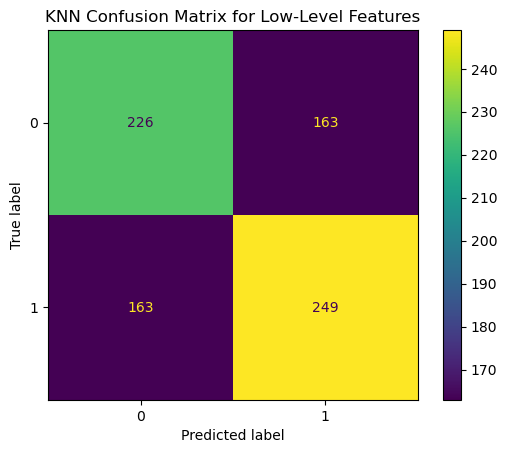

In [185]:
low_cm = confusion_matrix(low_signal_test, low_signal_test_pred)
print(f"Low-level features confusion matrix:\n{low_cm}")
print(f"Low-level features accuracy: {accuracy_score(low_signal_test, low_signal_test_pred)}")
ConfusionMatrixDisplay(confusion_matrix=low_cm).plot()
plt.title("KNN Confusion Matrix for Low-Level Features")
plt.show()

### Evaluate and display the confusion matrix for high-level features

High-level features confusion matrix:
[[245 144]
 [113 299]]
High-level features accuracy: 0.6791510611735331


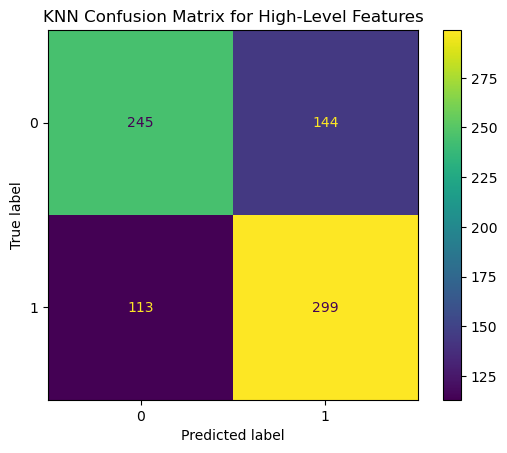

In [186]:
high_cm = confusion_matrix(high_signal_test, high_signal_test_pred)
print(f"High-level features confusion matrix:\n{high_cm}")
print(f"High-level features accuracy: {accuracy_score(high_signal_test, high_signal_test_pred)}")
ConfusionMatrixDisplay(confusion_matrix=high_cm).plot()
plt.title("KNN Confusion Matrix for High-Level Features")
plt.show()

### Compute and plot the ROC curve for low-level features

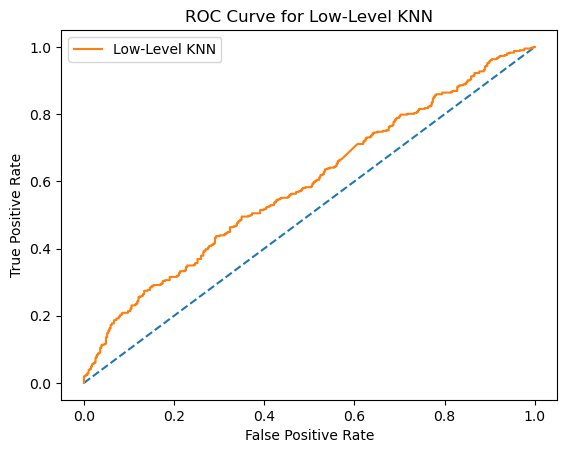

Low-level features AUC score: 0.5896997529138692


In [187]:
low_signal_test_binary = (low_signal_test == 1).astype(int)
fpr_low, tpr_low, _ = roc_curve(low_signal_test_binary, y_pred_prob_low)
roc_auc_low = roc_auc_score(low_signal_test_binary, y_pred_prob_low)
plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr_low, tpr_low, label='Low-Level KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Low-Level KNN')
plt.legend()
plt.show()
print(f'Low-level features AUC score: {roc_auc_low}')

### Compute and plot the ROC curve for high-level features

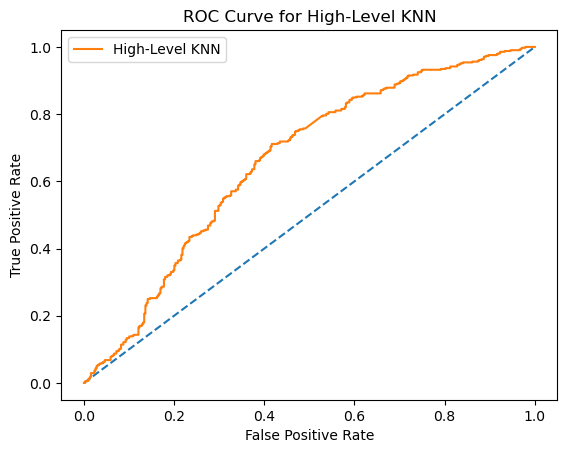

High-level features AUC score: 0.66040631941498


In [188]:
high_signal_test_binary = (high_signal_test == 1).astype(int)
fpr_high, tpr_high, _ = roc_curve(high_signal_test_binary, y_pred_prob_high)
roc_auc_high = roc_auc_score(high_signal_test_binary, y_pred_prob_high)
plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr_high, tpr_high, label='High-Level KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for High-Level KNN')
plt.legend()
plt.show()
print(f'High-level features AUC score: {roc_auc_high}')

## -SUPPORT VECTOR MACHINE

### Import decision tree classifier

In [189]:
from sklearn.svm import SVC

### Split the data

In [190]:
low_level_train, low_level_test, low_signal_train, low_signal_test = train_test_split(low_level, signal, test_size=0.1, random_state=34)
high_level_train, high_level_test, high_signal_train, high_signal_test = train_test_split(high_level, signal, test_size=0.1, random_state=34)

### Scale the data

In [191]:
scaler = StandardScaler()
low_level_train_scaled = scaler.fit_transform(low_level_train)
low_level_test_scaled = scaler.transform(low_level_test)
high_level_train_scaled = scaler.fit_transform(high_level_train)
high_level_test_scaled = scaler.transform(high_level_test)

### Initialize the Support Vector Machine classifier

In [192]:
svm_low_classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
svm_high_classifier = SVC(kernel = 'linear', random_state = 0, probability=True)

### Fit the model on the low-level training data

In [193]:
svm_low_classifier.fit(low_level_train_scaled, low_signal_train)

SVC(kernel='linear', probability=True, random_state=0)

### Predict using the trained model on the low-level test data

In [194]:
low_signal_test_pred = svm_low_classifier.predict(low_level_test_scaled)

### Fit the model on the high-level training data

In [195]:
svm_high_classifier.fit(high_level_train_scaled, high_signal_train)

SVC(kernel='linear', probability=True, random_state=0)

### Predict using the trained model on the high-level test data

In [196]:
high_signal_test_pred = svm_high_classifier.predict(high_level_test_scaled)

### Evaluate and display the confusion matrix for low-level features

Low-level features confusion matrix:
[[157 232]
 [125 287]]
Low-level features accuracy: 0.5543071161048689


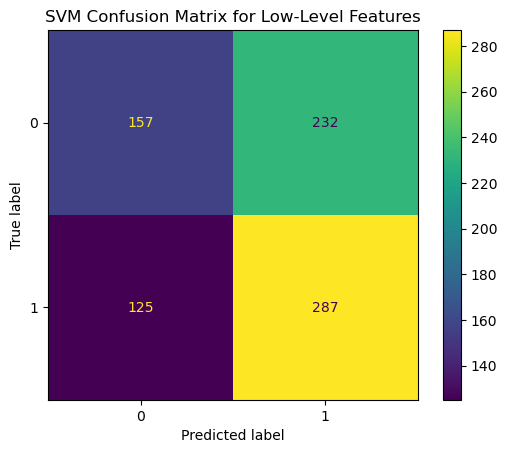

In [197]:
low_cm = confusion_matrix(low_signal_test, low_signal_test_pred)
print(f"Low-level features confusion matrix:\n{low_cm}")
print(f"Low-level features accuracy: {accuracy_score(low_signal_test, low_signal_test_pred)}")
ConfusionMatrixDisplay(confusion_matrix=low_cm).plot()
plt.title("SVM Confusion Matrix for Low-Level Features")
plt.show()

### Evaluate and display the confusion matrix for high-level features

High-level features confusion matrix:
[[153 236]
 [ 61 351]]
High-level features accuracy: 0.6292134831460674


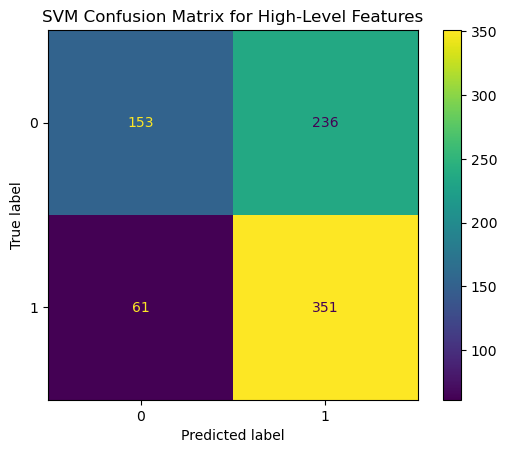

In [198]:
high_cm = confusion_matrix(high_signal_test, high_signal_test_pred)
print(f"High-level features confusion matrix:\n{high_cm}")
print(f"High-level features accuracy: {accuracy_score(high_signal_test, high_signal_test_pred)}")
ConfusionMatrixDisplay(confusion_matrix=high_cm).plot()
plt.title("SVM Confusion Matrix for High-Level Features")
plt.show()


### Compute and plot the ROC curve for low-level features

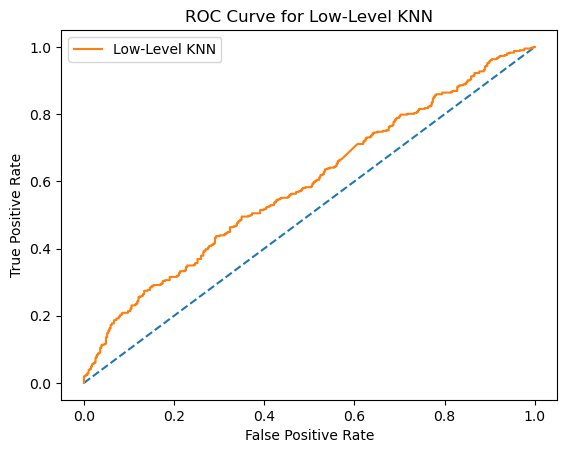

Low-level features AUC score: 0.5896997529138692


In [199]:
low_signal_test_binary = (low_signal_test == 1).astype(int)
fpr_low, tpr_low, _ = roc_curve(low_signal_test_binary, y_pred_prob_low)
roc_auc_low = roc_auc_score(low_signal_test_binary, y_pred_prob_low)
plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr_low, tpr_low, label='Low-Level KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Low-Level KNN')
plt.legend()
plt.show()
print(f'Low-level features AUC score: {roc_auc_low}')

### Compute and plot the ROC curve for high-level features

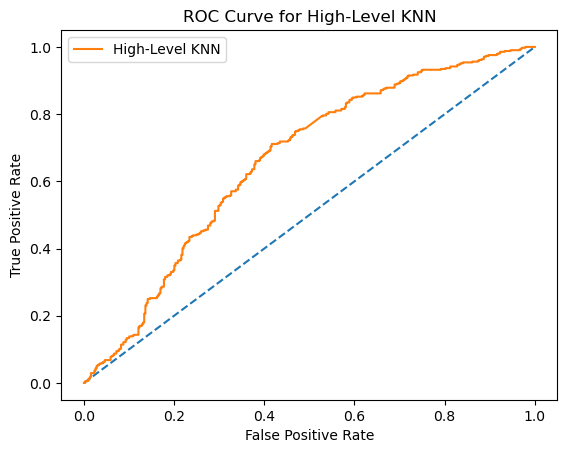

High-level features AUC score: 0.66040631941498


In [200]:
high_signal_test_binary = (high_signal_test == 1).astype(int)
fpr_high, tpr_high, _ = roc_curve(high_signal_test_binary, y_pred_prob_high)
roc_auc_high = roc_auc_score(high_signal_test_binary, y_pred_prob_high)
plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr_high, tpr_high, label='High-Level KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for High-Level KNN')
plt.legend()
plt.show()
print(f'High-level features AUC score: {roc_auc_high}')

## -NEURAL NETWORK CLASSIFIER

In [201]:

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam

### Split the data

In [202]:
low_level_train, low_level_test, low_signal_train, low_signal_test = train_test_split(low_level, signal, test_size=0.1, random_state=34)
high_level_train, high_level_test, high_signal_train, high_signal_test = train_test_split(high_level, signal, test_size=0.1, random_state=34)

### Scale the data

In [203]:
scaler = StandardScaler()
low_level_train_scaled = scaler.fit_transform(low_level_train)
low_level_test_scaled = scaler.transform(low_level_test)
high_level_train_scaled = scaler.fit_transform(high_level_train)
high_level_test_scaled = scaler.transform(high_level_test)

### Converting data to PyTorch tensors

In [204]:
x_low_train = torch.from_numpy(low_level_train_scaled).float()
y_low_train = torch.from_numpy(low_signal_train.values).float().view(-1, 1)
x_low_test = torch.from_numpy(low_level_test_scaled).float()
y_low_test = torch.from_numpy(low_signal_test.values).float().view(-1, 1)

x_high_train = torch.from_numpy(high_level_train_scaled).float()
y_high_train = torch.from_numpy(high_signal_train.values).float().view(-1, 1)
x_high_test = torch.from_numpy(high_level_test_scaled).float()
y_high_test = torch.from_numpy(high_signal_test.values).float().view(-1, 1)

### Defining the neural network class

In [205]:
class SimpleNeuralNet(nn.Module):
    def __init__(self, input_size):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(input_size, 12),
            torch.nn.ReLU(),
            torch.nn.Linear(12, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        return self.sequential(x)

### Initialize neural networks for low-level and high-level features

In [206]:
network_low = SimpleNeuralNet(21)
network_high = SimpleNeuralNet(7)

### Define the loss function and optimizer

In [207]:
criterion = nn.BCELoss()
optimizer_low = Adam(network_low.parameters(), lr=0.001)
optimizer_high = Adam(network_high.parameters(), lr=0.001)

### Prepare data loaders for low-level features

In [208]:
train_data_low = TensorDataset(x_low_train, y_low_train)
train_loader_low = DataLoader(train_data_low, batch_size=16, shuffle=True)

### Training the neural network for low-level features

In [209]:
epochs = 150
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader_low):
        optimizer_low.zero_grad()
        output = network_low(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer_low.step()
    print("Epoch:", epoch+1, "\tLoss:", loss.item())

Epoch: 1 	Loss: 0.6724350452423096
Epoch: 2 	Loss: 0.6879417300224304
Epoch: 3 	Loss: 0.685253381729126
Epoch: 4 	Loss: 0.6119362711906433
Epoch: 5 	Loss: 0.6470592021942139
Epoch: 6 	Loss: 0.6953616738319397
Epoch: 7 	Loss: 0.7500109672546387
Epoch: 8 	Loss: 0.5384505987167358
Epoch: 9 	Loss: 0.6598944664001465
Epoch: 10 	Loss: 0.5845743417739868
Epoch: 11 	Loss: 0.5923928618431091
Epoch: 12 	Loss: 0.6879621148109436
Epoch: 13 	Loss: 0.6249370574951172
Epoch: 14 	Loss: 0.7495669722557068
Epoch: 15 	Loss: 0.5974615216255188
Epoch: 16 	Loss: 0.5839000940322876
Epoch: 17 	Loss: 0.7074192762374878
Epoch: 18 	Loss: 0.8124333620071411
Epoch: 19 	Loss: 0.7114130854606628
Epoch: 20 	Loss: 0.6585990190505981
Epoch: 21 	Loss: 0.6462526917457581
Epoch: 22 	Loss: 0.7383837699890137
Epoch: 23 	Loss: 0.5251131057739258
Epoch: 24 	Loss: 0.7140149474143982
Epoch: 25 	Loss: 0.5437947511672974
Epoch: 26 	Loss: 0.6091231107711792
Epoch: 27 	Loss: 0.5932742953300476
Epoch: 28 	Loss: 0.7478852272033691
Ep

### Evaluate the neural network for low-level features

In [210]:
with torch.no_grad():
    output_low = network_low(x_low_test)
    test_loss_low = criterion(output_low, y_low_test)
    test_accuracy_low = (output_low.round() == y_low_test).float().mean()

print("Low-Level Test Loss:", test_loss_low.item(), "\tTest Accuracy:", test_accuracy_low.item())

Low-Level Test Loss: 0.6889715194702148 	Test Accuracy: 0.5917602777481079


### Prepare data loaders for high-level features

In [211]:
train_data_high = TensorDataset(x_high_train, y_high_train)
train_loader_high = DataLoader(train_data_high, batch_size=16, shuffle=True)

### Training the neural network for high-level features

In [218]:
train_data_high = TensorDataset(x_high_train, y_high_train)
train_loader_high = DataLoader(train_data_high, batch_size=16, shuffle=True)

for epoch in range(epochs):
    for data, target in train_loader_high:
        optimizer_high.zero_grad()
        output = network_high(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer_high.step()
    if (epoch + 1) % 10 == 0:
        print("High-Level Epoch:", epoch + 1, "\tLoss:", loss.item())

High-Level Epoch: 10 	Loss: 0.5122034549713135
High-Level Epoch: 20 	Loss: 0.7568317651748657
High-Level Epoch: 30 	Loss: 0.5405175685882568
High-Level Epoch: 40 	Loss: 0.4293801784515381
High-Level Epoch: 50 	Loss: 0.3377285301685333
High-Level Epoch: 60 	Loss: 0.49714958667755127
High-Level Epoch: 70 	Loss: 0.449317991733551
High-Level Epoch: 80 	Loss: 0.3992546796798706
High-Level Epoch: 90 	Loss: 0.6051869988441467
High-Level Epoch: 100 	Loss: 0.6128644943237305
High-Level Epoch: 110 	Loss: 0.4754860997200012
High-Level Epoch: 120 	Loss: 0.5278350114822388
High-Level Epoch: 130 	Loss: 0.7398992776870728
High-Level Epoch: 140 	Loss: 0.33715343475341797
High-Level Epoch: 150 	Loss: 0.46168339252471924


### Evaluate the neural network for high-level features

In [213]:
with torch.no_grad():
    output_high = network_high(x_high_test)
    test_loss_high = criterion(output_high, y_high_test)
    test_accuracy_high = (output_high.round() == y_high_test).float().mean()

print("High-Level Test Loss:", test_loss_high.item(), "\tTest Accuracy:", test_accuracy_high.item())

High-Level Test Loss: 0.567749559879303 	Test Accuracy: 0.7066166996955872


### Confusion Matrix for low-level features

Low-level features confusion matrix:
[[214 175]
 [152 260]]


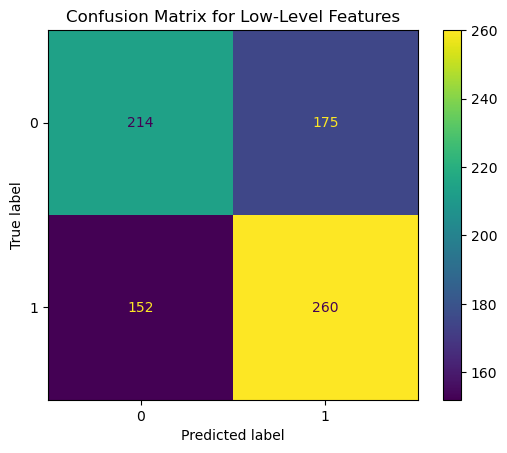

In [214]:
output_low_np = output_low.numpy()
y_low_test_np = y_low_test.numpy()

conf_matrix_low = confusion_matrix(y_low_test_np, output_low_np.round())
print(f"Low-level features confusion matrix:\n{conf_matrix_low}")
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_low).plot()
plt.title("ANN Confusion Matrix for Low-Level Features")
plt.show()

### ROC curve for low level features

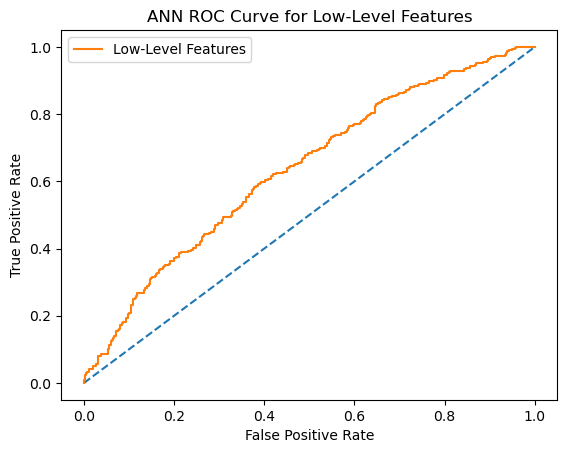

Low-level features AUC score: 0.6353108543190157


In [220]:
fpr_low, tpr_low, _ = roc_curve(y_low_test_np, output_low_np)
roc_auc_low = roc_auc_score(y_low_test_np, output_low_np)

plt.figure()
plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr_low, tpr_low, label='Low-Level Features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve for Low-Level Features')
plt.legend()
plt.show()
print(f'Low-level features AUC score: {roc_auc_low}')

### Confusion Matrix for high-level features


High-level features confusion matrix:
[[261 128]
 [107 305]]


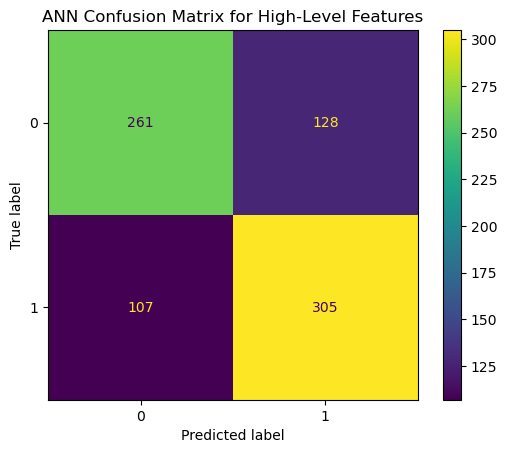

In [221]:
output_high_np = output_high.numpy()
y_high_test_np = y_high_test.numpy()

conf_matrix_high = confusion_matrix(y_high_test_np, output_high_np.round())
print(f"High-level features confusion matrix:\n{conf_matrix_high}")
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_high).plot()
plt.title("ANN Confusion Matrix for High-Level Features")
plt.show()

### ROC curve for high-level features


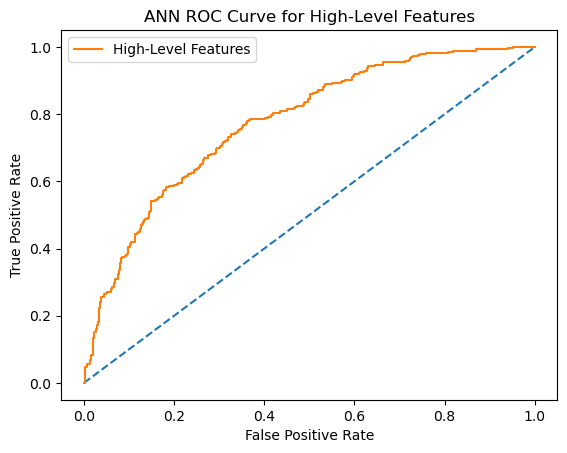

High-level features AUC score: 0.7747522899143934


In [222]:
fpr_high, tpr_high, _ = roc_curve(y_high_test_np, output_high_np)
roc_auc_high = roc_auc_score(y_high_test_np, output_high_np)

plt.figure()
plt.plot([0, 1], [0, 1], '--')
plt.plot(fpr_high, tpr_high, label='High-Level Features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve for High-Level Features')
plt.legend()
plt.show()
print(f'High-level features AUC score: {roc_auc_high}')